### Import libraries

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

### Funtion for converting raw data set

In [15]:
def convertShitToGold(pathToFile: str) -> pd.DataFrame:
    with open(pathToFile, "r") as f:
        lines = [line.rstrip("\n") for line in f.readlines()]

    treeType = []
    creatingTime = []
    printingTime = []
    rebalanceTime = []
    findminmaxTime = []
    nNodes = []

    for i in range(0, len(lines), 4):
        crtTime, trType, nn = lines[i].split()
        creatingTime.append(crtTime)
        treeType.append(trType.lstrip("creating"))
        nNodes.append(nn)
        printingTime.append(lines[i+1].split()[0])
        rebalanceTime.append(lines[i+2].split()[0])
        findminmaxTime.append(lines[i+3].split()[0])

    df = pd.DataFrame({
        "tree type": treeType,
        "number of nodes": nNodes,
        "creating time": creatingTime,
        "printing time": printingTime,
        "rebalancing time": rebalanceTime,
        "findminmax time": findminmaxTime
    })

    for col in ["number of nodes", "creating time", "printing time", "rebalancing time", "findminmax time"]:
        df[col] = df[col].astype("int64")

    return df

In [16]:
df = convertShitToGold("data/output.csv")
df.head(40)

,tree type,number of nodes,creating time,printing time,rebalancing time,findminmax time
0,AVL,100,0,119,1,4
1,BST,100,0,110,6,3
2,AVL,1000,0,1138,1,3
3,BST,1000,0,5820,34,2
4,AVL,10000,0,7461,0,2
5,BST,10000,1,41508,285,1
6,AVL,100000,5,69027,0,2
7,BST,100000,13,515244,3079,2
8,AVL,200000,11,138441,1,3
9,BST,200000,31,1018807,7232,2


### Average scores

In [17]:
df = df.groupby(["tree type", "number of nodes"]).mean()
df.head(10)

creating time  printing time  rebalancing time  \
tree type number of nodes                                                   
AVL       100                        0.0         126.50              1.50   
          1000                       0.0        1181.75              1.25   
          10000                      0.0        8267.00              0.50   
          100000                     5.0       69047.25              0.50   
          200000                    11.0      138015.50              1.00   
          300000                    17.0      206950.00              0.00   
          400000                    23.0      275672.25              1.00   
          500000                    30.0      344792.25              1.00   
BST       100                        0.0         133.00              7.25   
          1000                       0.0        5614.75             35.00   

                           findminmax time  
tree type number of nodes                   
AVL       100                         4.25  
          1000                        3.25  
          10000                       2.00  
          100000                      2.00  
          200000                      2.75  
          300000                      2.00  
          400000                      3.00  
          500000                      3.00  
BST       100                         3.75  
          1000                        2.00

### Graph

In [18]:
plt.style.use("ggplot")

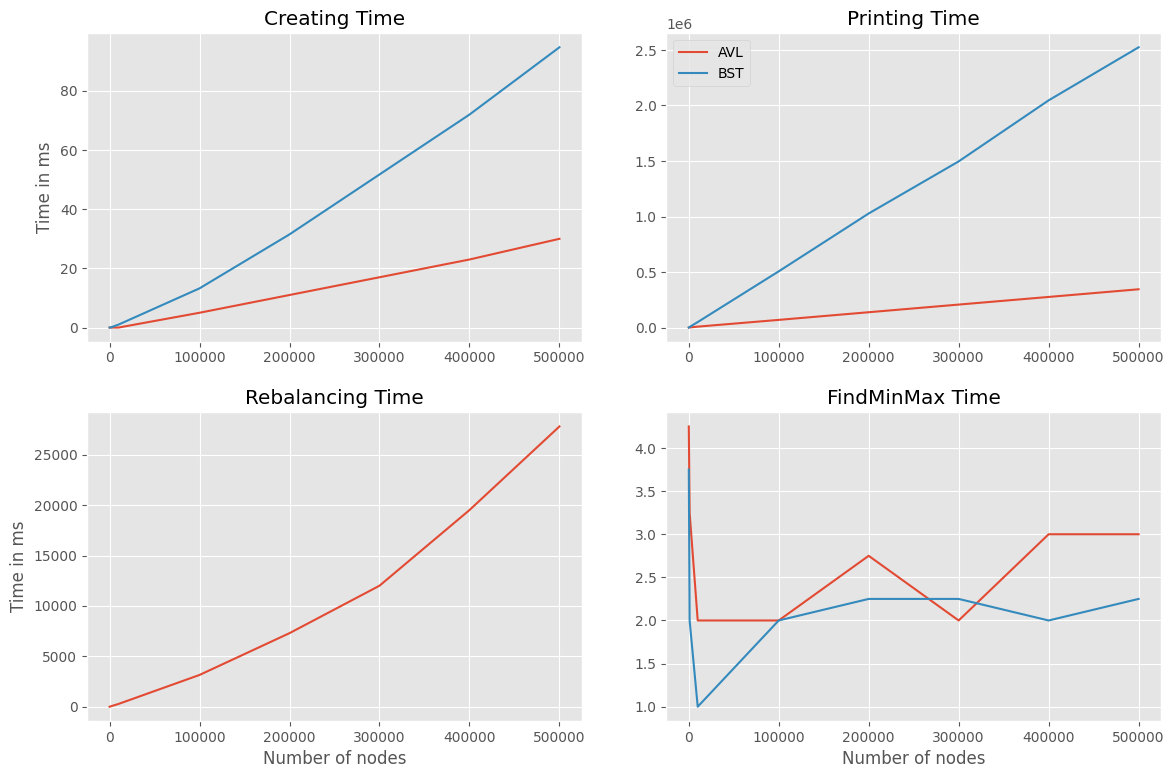

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
fig.tight_layout(pad=3)

# CREATING TIME
ax[0][0].set_title("Creating Time")
ax[0][0].set_ylabel("Time in ms")
ax[0][0].plot(df.loc["AVL"].index, df.loc["AVL"]['creating time'])
ax[0][0].plot(df.loc["BST"].index, df.loc["BST"]['creating time'])

# PRINTING TIME
ax[0][1].set_title("Printing Time")
ax[0][1].plot(df.loc["AVL"].index, df.loc["AVL"]['printing time'], label="AVL")
ax[0][1].plot(df.loc["BST"].index, df.loc["BST"]['printing time'], label="BST")
ax[0][1].legend()

# REBALANCING TIME
ax[1][0].set_title("Rebalancing Time")
ax[1][0].set_ylabel("Time in ms")
ax[1][0].set_xlabel("Number of nodes")
ax[1][0].plot(df.loc["BST"].index, df.loc["BST"]['rebalancing time'])

# FINDMINMAX TIME
ax[1][1].set_title("FindMinMax Time")
ax[1][1].set_xlabel("Number of nodes")
ax[1][1].plot(df.loc["AVL"].index, df.loc["AVL"]['findminmax time'])
ax[1][1].plot(df.loc["BST"].index, df.loc["BST"]['findminmax time'])

plt.savefig("graphs/graph.png")
plt.show()